# Data retrieval European Central Bank - Inflation 
HICP - Harmonized Index of Consumer Prices for the EURO area

In [15]:
import requests     # 2.18.4
import pandas as pd # 0.23.0
import io
from src.visualization import visualize

In [17]:

DATAFLOW = "ISP"
FREQ = "M"
REF_AREA = "NL"
ADJUSTMENT = "N"
CLASS = '000000'
PROVIDER = "4"  # ECB
VALIDATION = "ANR"
KEY = f'{DATAFLOW}/{FREQ}.{REF_AREA}.{ADJUSTMENT}.{CLASS}.{PROVIDER}.{VALIDATION}'
print (KEY)
KEY = 'ICP/M.NL.N.000000.4.ANR'
# KEY = 'ISP/M.NL.N.000000.4.ANR'
print (KEY)
start_period = '2019-01-01'
end_period = '2023-01-31'
parameters = {
    "startPeriod": start_period,
    "endPeriod": end_period,
}
url = (
    f"https://sdw-wsrest.ecb.europa.eu/service/data/"
    f"{KEY}"
)
response = requests.get(url, params=parameters,headers={"Accept": "text/csv"})
# Check if the response returns succesfully with response code 200
print(response)

# Print the full URL
print(response.url)

ISP/M.NL.N.000000.4.ANR
ICP/M.NL.N.000000.4.ANR
<Response [200]>
https://sdw-wsrest.ecb.europa.eu/service/data/ICP/M.NL.N.000000.4.ANR?startPeriod=2019-01-01&endPeriod=2023-01-31


In [8]:
# Read the response as a file into a Pandas DataFrame
df = pd.read_csv(io.StringIO(response.text))

In [9]:
# Check the DataFrame's information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   KEY              49 non-null     object 
 1   FREQ             49 non-null     object 
 2   REF_AREA         49 non-null     object 
 3   ADJUSTMENT       49 non-null     object 
 4   ICP_ITEM         49 non-null     int64  
 5   STS_INSTITUTION  49 non-null     int64  
 6   ICP_SUFFIX       49 non-null     object 
 7   TIME_PERIOD      49 non-null     object 
 8   OBS_VALUE        49 non-null     float64
 9   OBS_STATUS       49 non-null     object 
 10  OBS_CONF         49 non-null     object 
 11  OBS_PRE_BREAK    0 non-null      float64
 12  OBS_COM          0 non-null      float64
 13  TIME_FORMAT      49 non-null     object 
 14  BREAKS           0 non-null      float64
 15  COLLECTION       49 non-null     object 
 16  COMPILING_ORG    0 non-null      float64
 17  DATA_COMP        0

In [10]:
df.head()

,KEY,FREQ,REF_AREA,ADJUSTMENT,ICP_ITEM,STS_INSTITUTION,ICP_SUFFIX,TIME_PERIOD,OBS_VALUE,OBS_STATUS,...,PUBL_PUBLIC,UNIT_INDEX_BASE,COMPILATION,COVERAGE,DECIMALS,SOURCE_AGENCY,TITLE,TITLE_COMPL,UNIT,UNIT_MULT
0,ICP.M.NL.N.000000.4.ANR,M,NL,N,0,4,ANR,2019-01,2.0,A,...,NaN,NaN,NaN,NaN,1,NaN,HICP - Overall index,"Netherlands - HICP - Overall index, Annual rat...",PCCH,0
1,ICP.M.NL.N.000000.4.ANR,M,NL,N,0,4,ANR,2019-02,2.6,A,...,NaN,NaN,NaN,NaN,1,NaN,HICP - Overall index,"Netherlands - HICP - Overall index, Annual rat...",PCCH,0
2,ICP.M.NL.N.000000.4.ANR,M,NL,N,0,4,ANR,2019-03,2.9,A,...,NaN,NaN,NaN,NaN,1,NaN,HICP - Overall index,"Netherlands - HICP - Overall index, Annual rat...",PCCH,0
3,ICP.M.NL.N.000000.4.ANR,M,NL,N,0,4,ANR,2019-04,3.0,A,...,NaN,NaN,NaN,NaN,1,NaN,HICP - Overall index,"Netherlands - HICP - Overall index, Annual rat...",PCCH,0
4,ICP.M.NL.N.000000.4.ANR,M,NL,N,0,4,ANR,2019-05,2.3,A,...,NaN,NaN,NaN,NaN,1,NaN,HICP - Overall index,"Netherlands - HICP - Overall index, Annual rat...",PCCH,0


In [20]:
# Show the last 5 entries of the DataFrame
df.tail()

,KEY,FREQ,REF_AREA,ADJUSTMENT,ICP_ITEM,STS_INSTITUTION,ICP_SUFFIX,TIME_PERIOD,OBS_VALUE,OBS_STATUS,...,PUBL_PUBLIC,UNIT_INDEX_BASE,COMPILATION,COVERAGE,DECIMALS,SOURCE_AGENCY,TITLE,TITLE_COMPL,UNIT,UNIT_MULT
44,ICP.M.NL.N.000000.4.ANR,M,NL,N,0,4,ANR,2022-09,17.1,A,...,NaN,NaN,NaN,NaN,1,NaN,HICP - Overall index,"Netherlands - HICP - Overall index, Annual rat...",PCCH,0
45,ICP.M.NL.N.000000.4.ANR,M,NL,N,0,4,ANR,2022-10,16.8,A,...,NaN,NaN,NaN,NaN,1,NaN,HICP - Overall index,"Netherlands - HICP - Overall index, Annual rat...",PCCH,0
46,ICP.M.NL.N.000000.4.ANR,M,NL,N,0,4,ANR,2022-11,11.3,A,...,NaN,NaN,NaN,NaN,1,NaN,HICP - Overall index,"Netherlands - HICP - Overall index, Annual rat...",PCCH,0
47,ICP.M.NL.N.000000.4.ANR,M,NL,N,0,4,ANR,2022-12,11.0,A,...,NaN,NaN,NaN,NaN,1,NaN,HICP - Overall index,"Netherlands - HICP - Overall index, Annual rat...",PCCH,0
48,ICP.M.NL.N.000000.4.ANR,M,NL,N,0,4,ANR,2023-01,8.4,A,...,NaN,NaN,NaN,NaN,1,NaN,HICP - Overall index,"Netherlands - HICP - Overall index, Annual rat...",PCCH,0


In [21]:
# Create a new DataFrame called 'ts'
ts = df.filter(['TIME_PERIOD', 'OBS_VALUE'], axis=1)
# 'TIME_PERIOD' was of type 'object' (as seen in df.info). Convert it to datetime first
ts['TIME_PERIOD'] = pd.to_datetime(ts['TIME_PERIOD'])
# Set 'TIME_PERIOD' to be the index
ts = ts.set_index('TIME_PERIOD')
# Print the last 5 rows to screen
ts.tail()

,OBS_VALUE
TIME_PERIOD,
2022-09-01,17.1
2022-10-01,16.8
2022-11-01,11.3
2022-12-01,11.0
2023-01-01,8.4


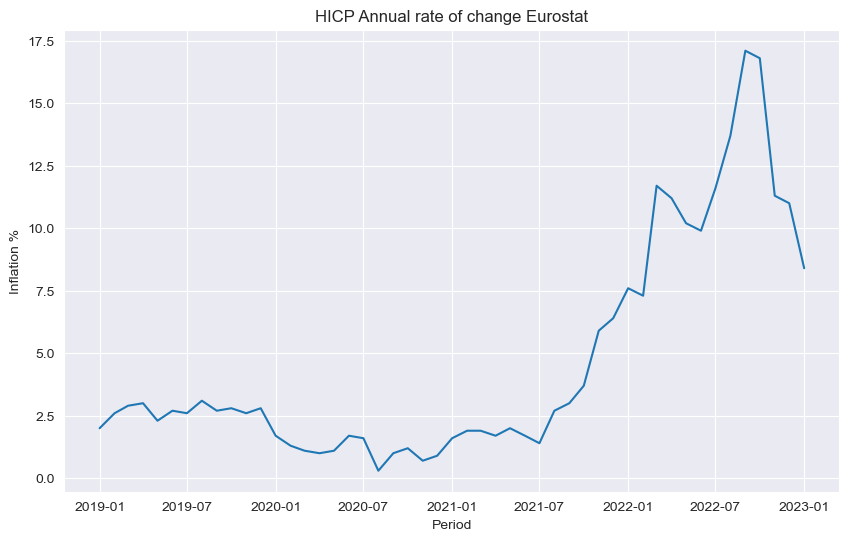

In [28]:
%matplotlib inline
visualize.lineplot(
    ts, 
    x = ts.index, 
    y = 'OBS_VALUE',
    x_label = 'Period',
    y_label = 'Inflation %',         
    title="HICP Annual rate of change Eurostat" );